In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('YourCabs.csv')
dataset.head()

,id,user_id,vehicle_model_id,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,2,NaN,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,2,NaN,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,2,NaN,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,2,NaN,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,2,NaN,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   43431 non-null  int64  
 1   user_id              43431 non-null  int64  
 2   vehicle_model_id     43431 non-null  int64  
 3   travel_type_id       43431 non-null  int64  
 4   package_id           7550 non-null   float64
 5   from_area_id         43343 non-null  float64
 6   to_area_id           34293 non-null  float64
 7   from_city_id         16345 non-null  float64
 8   to_city_id           1588 non-null   float64
 9   from_date            43431 non-null  object 
 10  online_booking       43431 non-null  int64  
 11  mobile_site_booking  43431 non-null  int64  
 12  booking_created      43431 non-null  object 
 13  from_lat             43338 non-null  float64
 14  from_long            43338 non-null  float64
 15  to_lat               34293 non-null 

In [4]:
# Drop id, user_id

dataset= dataset.drop('id',axis=1)
dataset

,user_id,vehicle_model_id,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,22177,28,2,NaN,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0
1,21413,12,2,NaN,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0
2,22178,12,2,NaN,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0
3,13034,12,2,NaN,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0
4,22180,12,2,NaN,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43426,14364,12,2,NaN,1147.0,452.0,15.0,NaN,11/24/2013 18:00,1,0,11/24/2013 14:25,13.030640,77.649100,12.952780,77.590880,0
43427,48727,12,2,NaN,393.0,466.0,15.0,NaN,11/26/2013 1:00,1,0,11/24/2013 14:30,13.199560,77.706880,13.017436,77.644580,0
43428,48729,12,3,1.0,974.0,NaN,15.0,NaN,11/24/2013 18:30,0,0,11/24/2013 14:35,13.075570,77.559040,NaN,NaN,0
43429,30724,87,2,NaN,1263.0,542.0,15.0,NaN,11/24/2013 16:00,0,0,11/24/2013 14:43,12.968970,77.594560,12.938230,77.622890,0


In [5]:
del dataset['user_id']
dataset

,vehicle_model_id,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,28,2,NaN,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0
1,12,2,NaN,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0
2,12,2,NaN,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0
3,12,2,NaN,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0
4,12,2,NaN,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43426,12,2,NaN,1147.0,452.0,15.0,NaN,11/24/2013 18:00,1,0,11/24/2013 14:25,13.030640,77.649100,12.952780,77.590880,0
43427,12,2,NaN,393.0,466.0,15.0,NaN,11/26/2013 1:00,1,0,11/24/2013 14:30,13.199560,77.706880,13.017436,77.644580,0
43428,12,3,1.0,974.0,NaN,15.0,NaN,11/24/2013 18:30,0,0,11/24/2013 14:35,13.075570,77.559040,NaN,NaN,0
43429,87,2,NaN,1263.0,542.0,15.0,NaN,11/24/2013 16:00,0,0,11/24/2013 14:43,12.968970,77.594560,12.938230,77.622890,0


In [6]:
dataset.vehicle_model_id = dataset.vehicle_model_id.astype('object') # Categorical Variable
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vehicle_model_id     43431 non-null  object 
 1   travel_type_id       43431 non-null  int64  
 2   package_id           7550 non-null   float64
 3   from_area_id         43343 non-null  float64
 4   to_area_id           34293 non-null  float64
 5   from_city_id         16345 non-null  float64
 6   to_city_id           1588 non-null   float64
 7   from_date            43431 non-null  object 
 8   online_booking       43431 non-null  int64  
 9   mobile_site_booking  43431 non-null  int64  
 10  booking_created      43431 non-null  object 
 11  from_lat             43338 non-null  float64
 12  from_long            43338 non-null  float64
 13  to_lat               34293 non-null  float64
 14  to_long              34293 non-null  float64
 15  Car_Cancellation     43431 non-null 

In [7]:
dataset.vehicle_model_id.describe()

count     43431
unique       27
top          12
freq      31859
Name: vehicle_model_id, dtype: int64

In [8]:
dataset['is_VMID_12']= pd.get_dummies(dataset.vehicle_model_id)[12].astype('int')
dataset.head()

,vehicle_model_id,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,is_VMID_12
0,28,2,NaN,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0,0
1,12,2,NaN,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0,1
2,12,2,NaN,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0,1
3,12,2,NaN,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0,1
4,12,2,NaN,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0,1


In [9]:
del dataset['vehicle_model_id']
dataset.head()

,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,is_VMID_12
0,2,NaN,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0,0
1,2,NaN,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0,1
2,2,NaN,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0,1
3,2,NaN,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0,1
4,2,NaN,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0,1


# Splitting the data

In [10]:
df_tt_1 = dataset.loc[dataset.travel_type_id==1]
df_tt_1.head()

,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,is_VMID_12
6,1,NaN,571.0,NaN,15.0,108.0,01-01-2013 09:45,0,0,01-01-2013 09:21,12.951850,77.696420,NaN,NaN,0,1
17,1,NaN,1383.0,NaN,NaN,32.0,01-12-2013 08:00,1,0,01-01-2013 12:17,12.930451,77.685822,NaN,NaN,0,0
24,1,NaN,515.0,NaN,15.0,32.0,01-05-2013 08:30,0,0,01-01-2013 14:40,12.978960,77.673450,NaN,NaN,0,0
158,1,NaN,136.0,NaN,1.0,152.0,01-04-2013 09:30,1,0,01-03-2013 12:19,12.907960,77.624180,NaN,NaN,0,0
216,1,NaN,1118.0,NaN,NaN,32.0,01-06-2013 07:30,1,0,01-04-2013 09:32,12.930220,77.560390,NaN,NaN,0,0


In [11]:
df_tt_2 = dataset.loc[dataset.travel_type_id==2]
df_tt_2.head()

,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,is_VMID_12
0,2,NaN,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0,0
1,2,NaN,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0,1
2,2,NaN,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0,1
3,2,NaN,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0,1
4,2,NaN,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0,1


In [12]:
df_tt_3 = dataset.loc[dataset.travel_type_id==3]
df_tt_3.head()

,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,is_VMID_12
8,3,2.0,448.0,NaN,NaN,NaN,01-01-2013 16:00,0,0,01-01-2013 09:44,12.927320,77.635750,NaN,NaN,0,0
20,3,2.0,471.0,NaN,NaN,NaN,01-01-2013 14:30,0,0,01-01-2013 12:52,13.018540,77.635240,NaN,NaN,0,0
23,3,1.0,1286.0,NaN,NaN,NaN,01-01-2013 16:30,0,0,01-01-2013 14:39,12.973448,77.620320,NaN,NaN,0,1
34,3,1.0,1323.0,NaN,NaN,NaN,01-01-2013 20:00,1,0,01-01-2013 17:25,12.869805,77.653211,NaN,NaN,0,1
47,3,2.0,142.0,NaN,NaN,NaN,01-02-2013 03:00,0,0,01-01-2013 19:37,12.912810,77.609230,NaN,NaN,0,1


# tt_id==1

In [13]:
df_tt_1 = df_tt_1.drop(['travel_type_id','package_id','to_area_id','from_lat','from_long','to_lat','to_long'],axis=1)
df_tt_1.head()

,from_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_VMID_12
6,571.0,15.0,108.0,01-01-2013 09:45,0,0,01-01-2013 09:21,0,1
17,1383.0,NaN,32.0,01-12-2013 08:00,1,0,01-01-2013 12:17,0,0
24,515.0,15.0,32.0,01-05-2013 08:30,0,0,01-01-2013 14:40,0,0
158,136.0,1.0,152.0,01-04-2013 09:30,1,0,01-03-2013 12:19,0,0
216,1118.0,NaN,32.0,01-06-2013 07:30,1,0,01-04-2013 09:32,0,0


In [14]:
df_tt_1.isnull().sum()

from_area_id            88
from_city_id           196
to_city_id               1
from_date                0
online_booking           0
mobile_site_booking      0
booking_created          0
Car_Cancellation         0
is_VMID_12               0
dtype: int64

In [15]:
df_tt_1.shape

(1589, 9)

In [16]:
df_tt_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1589 entries, 6 to 43407
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   from_area_id         1501 non-null   float64
 1   from_city_id         1393 non-null   float64
 2   to_city_id           1588 non-null   float64
 3   from_date            1589 non-null   object 
 4   online_booking       1589 non-null   int64  
 5   mobile_site_booking  1589 non-null   int64  
 6   booking_created      1589 non-null   object 
 7   Car_Cancellation     1589 non-null   int64  
 8   is_VMID_12           1589 non-null   int32  
dtypes: float64(3), int32(1), int64(3), object(2)
memory usage: 117.9+ KB


In [17]:
df_tt_1 = df_tt_1.astype({'from_area_id':'object','from_city_id':'object','to_city_id':'object'})

df_tt_1.from_date = pd.to_datetime(df_tt_1.from_date)
df_tt_1.booking_created = pd.to_datetime(df_tt_1.booking_created)


df_tt_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1589 entries, 6 to 43407
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   from_area_id         1501 non-null   object        
 1   from_city_id         1393 non-null   object        
 2   to_city_id           1588 non-null   object        
 3   from_date            1589 non-null   datetime64[ns]
 4   online_booking       1589 non-null   int64         
 5   mobile_site_booking  1589 non-null   int64         
 6   booking_created      1589 non-null   datetime64[ns]
 7   Car_Cancellation     1589 non-null   int64         
 8   is_VMID_12           1589 non-null   int32         
dtypes: datetime64[ns](2), int32(1), int64(3), object(3)
memory usage: 117.9+ KB


In [18]:
df_tt_1.describe(include='object')

,from_area_id,from_city_id,to_city_id
count,1501.0,1393.0,1588.0
unique,297.0,3.0,116.0
top,393.0,15.0,32.0
freq,257.0,1281.0,475.0


In [19]:
df_tt_1.from_area_id = df_tt_1.from_area_id.fillna(393)
df_tt_1.from_city_id = df_tt_1.from_city_id.fillna(15)
df_tt_1.to_city_id =df_tt_1.to_city_id.fillna(32)

In [20]:
df_tt_1.isnull().sum()

from_area_id           0
from_city_id           0
to_city_id             0
from_date              0
online_booking         0
mobile_site_booking    0
booking_created        0
Car_Cancellation       0
is_VMID_12             0
dtype: int64

In [21]:
df_tt_1[['from_area_id','Car_Cancellation']]

,from_area_id,Car_Cancellation
6,571.0,0
17,1383.0,0
24,515.0,0
158,136.0,0
216,1118.0,0
...,...,...
43342,393.0,0
43385,119.0,0
43386,1281.0,0
43393,393.0,0


In [22]:
df_tt_1[['from_area_id','Car_Cancellation']].groupby('from_area_id').mean()

,Car_Cancellation
from_area_id,
2.0,0.0
24.0,0.0
25.0,0.0
49.0,0.0
58.0,0.0
...,...
1394.0,0.0
1395.0,0.0
1396.0,0.0


In [23]:
from_area_id_perc = df_tt_1[['from_area_id','Car_Cancellation']].groupby('from_area_id').mean()['Car_Cancellation']
from_area_id_perc

from_area_id
2.0       0.0
24.0      0.0
25.0      0.0
49.0      0.0
58.0      0.0
         ... 
1394.0    0.0
1395.0    0.0
1396.0    0.0
1397.0    0.0
1398.0    0.0
Name: Car_Cancellation, Length: 297, dtype: float64

In [24]:
df_tt_1['from_area_id_cancel_perc'] = df_tt_1.from_area_id.map(from_area_id_perc)
df_tt_1.head(200)

,from_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_VMID_12,from_area_id_cancel_perc
6,571.0,15.0,108.0,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,1,0.020408
17,1383.0,15.0,32.0,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,0,0.000000
24,515.0,15.0,32.0,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,0,0.000000
158,136.0,1.0,152.0,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,0.000000
216,1118.0,15.0,32.0,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...
6584,393.0,15.0,32.0,2013-03-11 06:15:00,1,0,2013-03-09 16:26:00,0,0,0.008696
6646,590.0,15.0,115.0,2013-03-10 11:00:00,0,0,2013-03-10 08:45:00,0,0,0.000000
6660,297.0,15.0,44.0,2013-03-13 06:00:00,0,0,2013-03-10 11:14:00,0,0,0.000000
6672,1010.0,15.0,51.0,2013-03-11 07:00:00,0,0,2013-03-10 13:41:00,0,1,0.000000


In [25]:
df_tt_1.from_area_id_cancel_perc.describe()

count    1589.000000
mean        0.013216
std         0.044239
min         0.000000
25%         0.000000
50%         0.000000
75%         0.008696
max         0.500000
Name: from_area_id_cancel_perc, dtype: float64

In [26]:
df_tt_1['FAID_cancel_vol']=np.where(df_tt_1.from_area_id_cancel_perc==0,'Low',
                                   np.where(df_tt_1.from_area_id_cancel_perc>0.009,'High','Medium'))
df_tt_1.head()

,from_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_VMID_12,from_area_id_cancel_perc,FAID_cancel_vol
6,571.0,15.0,108.0,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,1,0.020408,High
17,1383.0,15.0,32.0,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,0,0.000000,Low
24,515.0,15.0,32.0,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,0,0.000000,Low
158,136.0,1.0,152.0,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,0.000000,Low
216,1118.0,15.0,32.0,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,0,0.000000,Low


In [27]:
df_tt_1.head(200)

,from_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_VMID_12,from_area_id_cancel_perc,FAID_cancel_vol
6,571.0,15.0,108.0,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,1,0.020408,High
17,1383.0,15.0,32.0,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,0,0.000000,Low
24,515.0,15.0,32.0,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,0,0.000000,Low
158,136.0,1.0,152.0,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,0.000000,Low
216,1118.0,15.0,32.0,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,0,0.000000,Low
...,...,...,...,...,...,...,...,...,...,...,...
6584,393.0,15.0,32.0,2013-03-11 06:15:00,1,0,2013-03-09 16:26:00,0,0,0.008696,Medium
6646,590.0,15.0,115.0,2013-03-10 11:00:00,0,0,2013-03-10 08:45:00,0,0,0.000000,Low
6660,297.0,15.0,44.0,2013-03-13 06:00:00,0,0,2013-03-10 11:14:00,0,0,0.000000,Low
6672,1010.0,15.0,51.0,2013-03-11 07:00:00,0,0,2013-03-10 13:41:00,0,1,0.000000,Low


In [28]:
df_tt_1.FAID_cancel_vol.value_counts()

Low       979
Medium    345
High      265
Name: FAID_cancel_vol, dtype: int64

In [29]:
df_tt_1 = df_tt_1.drop(['from_area_id_cancel_perc','from_area_id'],axis=1)
df_tt_1.head()

,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_VMID_12,FAID_cancel_vol
6,15.0,108.0,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,1,High
17,15.0,32.0,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,0,Low
24,15.0,32.0,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,0,Low
158,1.0,152.0,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,Low
216,15.0,32.0,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,0,Low


# from_city_id , to_city_id

In [30]:
df_tt_1.from_city_id = df_tt_1.from_city_id.astype('int')
df_tt_1.to_city_id = df_tt_1.to_city_id.astype('int')
df_tt_1.head()

,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_VMID_12,FAID_cancel_vol
6,15,108,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,1,High
17,15,32,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,0,Low
24,15,32,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,0,Low
158,1,152,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,Low
216,15,32,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,0,Low


In [31]:
# Creating city routes

df_tt_1['city_route'] = df_tt_1.from_city_id.astype('str')+'->'+ df_tt_1.to_city_id.astype('str')
df_tt_1.head()

,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_VMID_12,FAID_cancel_vol,city_route
6,15,108,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,1,High,15->108
17,15,32,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,0,Low,15->32
24,15,32,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,0,Low,15->32
158,1,152,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,Low,1->152
216,15,32,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,0,Low,15->32


In [32]:
city_route_cancelation_perc = df_tt_1[['city_route','Car_Cancellation']].groupby('city_route').mean()['Car_Cancellation']
df_tt_1['city_route_cancelation_perc'] = df_tt_1.city_route.map(city_route_cancelation_perc)
df_tt_1['city_route_cancelation_volume'] = np.where(df_tt_1.city_route_cancelation_perc>=0.67,'High',
                                                   np.where(df_tt_1.city_route_cancelation_perc==0.0,'Zero',
                                                           np.where(df_tt_1.city_route_cancelation_perc<=0.34,'Low',
                                                                   'Medium')))
df_tt_1.head()

,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_VMID_12,FAID_cancel_vol,city_route,city_route_cancelation_perc,city_route_cancelation_volume
6,15,108,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,1,High,15->108,0.016129,Low
17,15,32,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,0,Low,15->32,0.017937,Low
24,15,32,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,0,Low,15->32,0.017937,Low
158,1,152,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,Low,1->152,0.000000,Zero
216,15,32,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,0,Low,15->32,0.017937,Low


In [33]:
df_tt_1 = df_tt_1.drop(['from_city_id','to_city_id','city_route','city_route_cancelation_perc'],axis=1)
df_tt_1.head()

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_VMID_12,FAID_cancel_vol,city_route_cancelation_volume
6,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,1,High,Low
17,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,0,Low,Low
24,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,0,Low,Low
158,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,Low,Zero
216,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,0,Low,Low


# from_date , booking_created

In [34]:
df_tt_1['month'] = df_tt_1.from_date.dt.month
df_tt_1.head()

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_VMID_12,FAID_cancel_vol,city_route_cancelation_volume,month
6,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,1,High,Low,1
17,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,0,Low,Low,1
24,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,0,Low,Low,1
158,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,Low,Zero,1
216,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,0,Low,Low,1


In [35]:
df_tt_1['day_of_week'] = df_tt_1.from_date.dt.dayofweek
df_tt_1.head()

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_VMID_12,FAID_cancel_vol,city_route_cancelation_volume,month,day_of_week
6,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,1,High,Low,1,1
17,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,0,Low,Low,1,5
24,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,0,Low,Low,1,5
158,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,Low,Zero,1,4
216,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,0,Low,Low,1,6


In [36]:
df_tt_1['is_weekend'] = (df_tt_1['day_of_week']>=5).astype('int')
df_tt_1.head()

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_VMID_12,FAID_cancel_vol,city_route_cancelation_volume,month,day_of_week,is_weekend
6,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,1,High,Low,1,1,0
17,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,0,Low,Low,1,5,1
24,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,0,Low,Low,1,5,1
158,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,Low,Zero,1,4,0
216,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,0,Low,Low,1,6,1


In [37]:
df_tt_1['hour_of_day'] = df_tt_1.from_date.dt.hour
df_tt_1.head()

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_VMID_12,FAID_cancel_vol,city_route_cancelation_volume,month,day_of_week,is_weekend,hour_of_day
6,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,1,High,Low,1,1,0,9
17,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,0,Low,Low,1,5,1,8
24,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,0,Low,Low,1,5,1,8
158,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,Low,Zero,1,4,0,9
216,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,0,Low,Low,1,6,1,7


In [38]:
df_tt_1['time_of_day'] = pd.cut(df_tt_1['hour_of_day'],bins=[1,6,12,18,24],labels=['Night','Morning','Afternoon','Evening'])
df_tt_1.head()

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_VMID_12,FAID_cancel_vol,city_route_cancelation_volume,month,day_of_week,is_weekend,hour_of_day,time_of_day
6,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,1,High,Low,1,1,0,9,Morning
17,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,0,Low,Low,1,5,1,8,Morning
24,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,0,Low,Low,1,5,1,8,Morning
158,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,Low,Zero,1,4,0,9,Morning
216,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,0,Low,Low,1,6,1,7,Morning


In [39]:
df_tt_1['time_diff'] = (df_tt_1.from_date-df_tt_1.booking_created).dt.total_seconds()/3600
df_tt_1.head()

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_VMID_12,FAID_cancel_vol,city_route_cancelation_volume,month,day_of_week,is_weekend,hour_of_day,time_of_day,time_diff
6,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,1,High,Low,1,1,0,9,Morning,0.400000
17,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,0,Low,Low,1,5,1,8,Morning,259.716667
24,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,0,Low,Low,1,5,1,8,Morning,89.833333
158,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,Low,Zero,1,4,0,9,Morning,21.183333
216,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,0,Low,Low,1,6,1,7,Morning,45.966667


<Axes: >

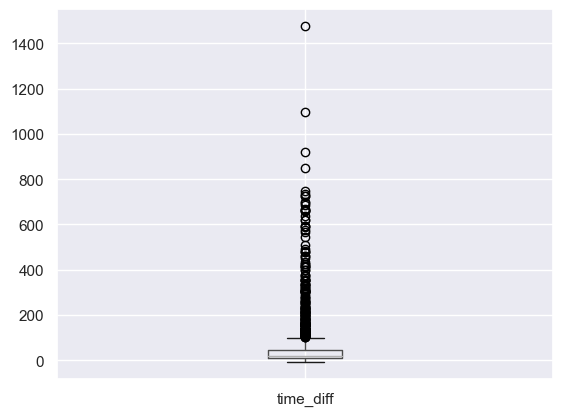

In [40]:
df_tt_1.boxplot('time_diff')

In [41]:
Q1 = df_tt_1['time_diff'].quantile(0.25)
Q3 = df_tt_1['time_diff'].quantile(0.75)

IQR = Q3-Q1

LL = Q1 - 1.5*IQR
UL = Q3 + 1.5*IQR

print(f"Q1: {Q1} | Q3: {Q3} | IQR: {IQR} | LL: {LL} | UL: {UL}")

outlier_count_ul = df_tt_1[df_tt_1['time_diff']>UL].shape[0]
outlier_perc_ul = (outlier_count_ul*100)/df_tt_1.shape[0]

outlier_count_ll = df_tt_1[df_tt_1['time_diff']>LL].shape[0]
outlier_perc_ll = (outlier_count_ll*100)/df_tt_1.shape[0]

print(f"# of Outliers on the Higher Side: {outlier_count_ul} | % of Outliers on the Higher Side: {outlier_perc_ul}%")
print(f"# of Outliers on the Lower Side: {outlier_count_ll} | % of Outliers on the Lower Side: {outlier_perc_ll}%")

Q1: 9.05 | Q3: 44.55 | IQR: 35.5 | LL: -44.2 | UL: 97.8
# of Outliers on the Higher Side: 219 | % of Outliers on the Higher Side: 13.782252989301448%
# of Outliers on the Lower Side: 1589 | % of Outliers on the Lower Side: 100.0%


In [42]:
# Since > 13% of the rows are outliers, we will create categories, rather than replacing with limits

In [43]:
df_tt_1['time_diff'].describe()

count    1589.000000
mean       55.630407
std       114.717939
min        -7.700000
25%         9.050000
50%        16.950000
75%        44.550000
max      1477.183333
Name: time_diff, dtype: float64

In [44]:
df_tt_1['booking_nature'] = pd.cut(df_tt_1['time_diff'], bins=[-8,2,17,45,1500],labels=['Urgent','SameDay','Regular','Advance'])
df_tt_1.head()

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_VMID_12,FAID_cancel_vol,city_route_cancelation_volume,month,day_of_week,is_weekend,hour_of_day,time_of_day,time_diff,booking_nature
6,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,1,High,Low,1,1,0,9,Morning,0.400000,Urgent
17,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,0,Low,Low,1,5,1,8,Morning,259.716667,Advance
24,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,0,Low,Low,1,5,1,8,Morning,89.833333,Advance
158,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,Low,Zero,1,4,0,9,Morning,21.183333,Regular
216,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,0,Low,Low,1,6,1,7,Morning,45.966667,Advance


In [45]:
df_tt_1 = df_tt_1.drop(['from_date','booking_created','hour_of_day','time_diff'],axis=1)
df_tt_1.head()

,online_booking,mobile_site_booking,Car_Cancellation,is_VMID_12,FAID_cancel_vol,city_route_cancelation_volume,month,day_of_week,is_weekend,time_of_day,booking_nature
6,0,0,0,1,High,Low,1,1,0,Morning,Urgent
17,1,0,0,0,Low,Low,1,5,1,Morning,Advance
24,0,0,0,0,Low,Low,1,5,1,Morning,Advance
158,1,0,0,0,Low,Zero,1,4,0,Morning,Regular
216,1,0,0,0,Low,Low,1,6,1,Morning,Advance


# Rearranging the columns

In [46]:
df_tt_1 = df_tt_1[['FAID_cancel_vol','city_route_cancelation_volume','booking_nature','time_of_day','is_weekend','day_of_week','month','is_VMID_12','online_booking','online_booking','Car_Cancellation']]
df_tt_1.head()

,FAID_cancel_vol,city_route_cancelation_volume,booking_nature,time_of_day,is_weekend,day_of_week,month,is_VMID_12,online_booking,online_booking,Car_Cancellation
6,High,Low,Urgent,Morning,0,1,1,1,0,0,0
17,Low,Low,Advance,Morning,1,5,1,0,1,1,0
24,Low,Low,Advance,Morning,1,5,1,0,0,0,0
158,Low,Zero,Regular,Morning,0,4,1,0,1,1,0
216,Low,Low,Advance,Morning,1,6,1,0,1,1,0


# EDA

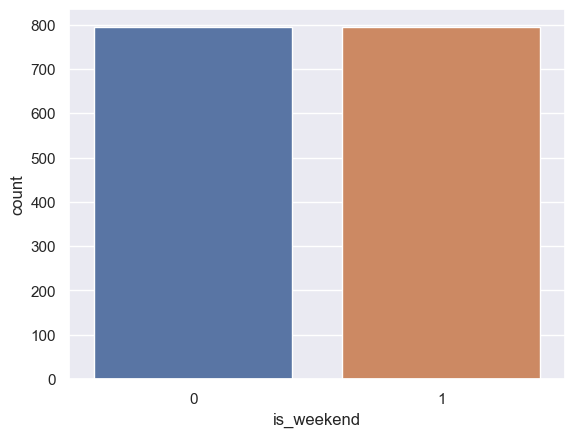

In [47]:
sns.countplot(x='is_weekend',data=df_tt_1) # booking volume on weekday and weekend
plt.show()

# The booking volume is almost the same on weekdays and weekends

<Axes: xlabel='is_weekend', ylabel='count'>

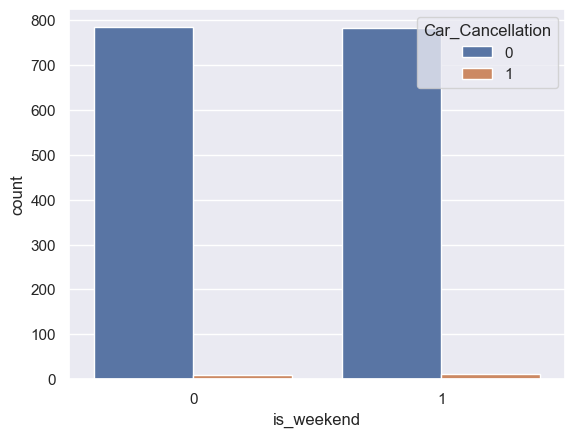

In [48]:
sns.countplot(x='is_weekend',hue='Car_Cancellation',data=df_tt_1)

# The Cancelation volume is almost the same on weekdays and weekends

In [49]:
# Drop the is_weekend col, because not much information provided for calculation behaviour

df_tt_1 = df_tt_1.drop('is_weekend',axis=1)
df_tt_1.head()

,FAID_cancel_vol,city_route_cancelation_volume,booking_nature,time_of_day,day_of_week,month,is_VMID_12,online_booking,online_booking,Car_Cancellation
6,High,Low,Urgent,Morning,1,1,1,0,0,0
17,Low,Low,Advance,Morning,5,1,0,1,1,0
24,Low,Low,Advance,Morning,5,1,0,0,0,0
158,Low,Zero,Regular,Morning,4,1,0,1,1,0
216,Low,Low,Advance,Morning,6,1,0,1,1,0


<Axes: xlabel='day_of_week', ylabel='count'>

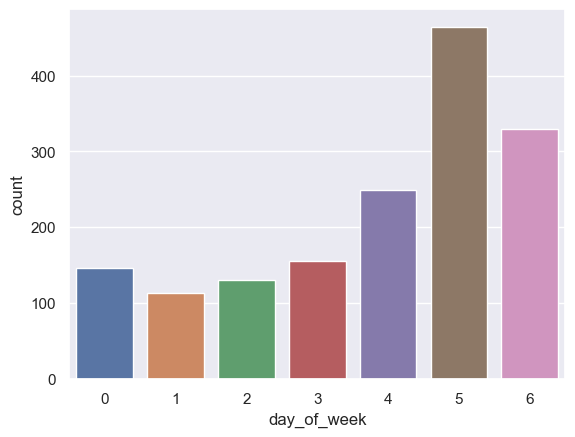

In [50]:
sns.countplot(x='day_of_week',data= df_tt_1) # booking volume on a day of week

<Axes: xlabel='day_of_week', ylabel='count'>

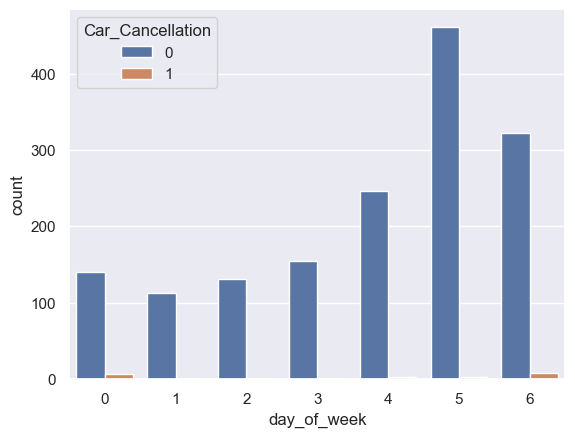

In [51]:
sns.countplot(x='day_of_week',hue='Car_Cancellation',data=df_tt_1)

<Axes: xlabel='day_of_week', ylabel='count'>

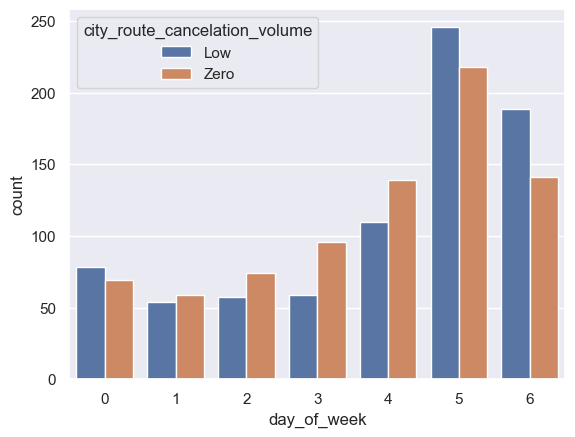

In [52]:
sns.countplot(x='day_of_week',hue='city_route_cancelation_volume',data=df_tt_1)

<Axes: xlabel='day_of_week', ylabel='count'>

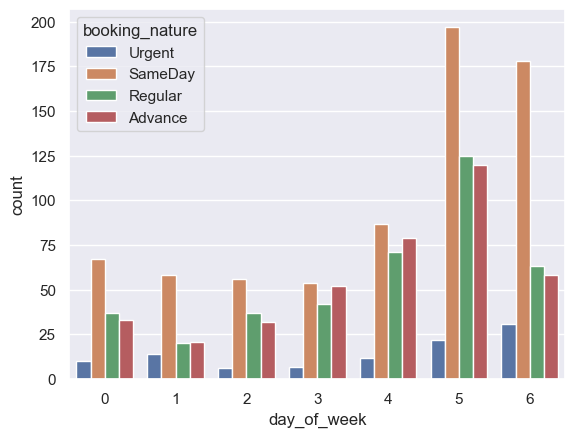

In [53]:
sns.countplot(x='day_of_week',hue='booking_nature',data=df_tt_1)

<Axes: xlabel='booking_nature', ylabel='count'>

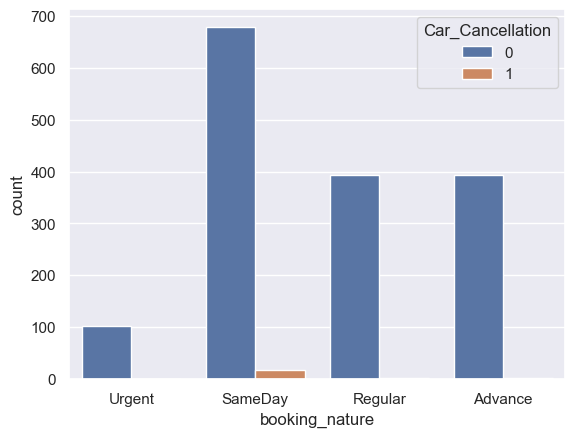

In [54]:
sns.countplot(x='booking_nature',hue='Car_Cancellation',data=df_tt_1)

# Label Encoding

In [55]:
df_tt_1.head()

,FAID_cancel_vol,city_route_cancelation_volume,booking_nature,time_of_day,day_of_week,month,is_VMID_12,online_booking,online_booking,Car_Cancellation
6,High,Low,Urgent,Morning,1,1,1,0,0,0
17,Low,Low,Advance,Morning,5,1,0,1,1,0
24,Low,Low,Advance,Morning,5,1,0,0,0,0
158,Low,Zero,Regular,Morning,4,1,0,1,1,0
216,Low,Low,Advance,Morning,6,1,0,1,1,0


In [56]:
df_tt_1.FAID_cancel_vol = df_tt_1.FAID_cancel_vol.map({"Low":1,"Medium":2,"High":3})
df_tt_1.city_route_cancelation_volume = df_tt_1.city_route_cancelation_volume.map({"Zero":1,"Low":2,"Medium":3,"High":4})
df_tt_1.booking_nature = df_tt_1.booking_nature.map({"Urgent":1,"SameDay":2,"Regular":3,"Advance":4})
df_tt_1.time_of_day = df_tt_1.time_of_day.map({"Morning":1,"Afternoon":2,"Evening":3,"Night":4})
df_tt_1.head()

,FAID_cancel_vol,city_route_cancelation_volume,booking_nature,time_of_day,day_of_week,month,is_VMID_12,online_booking,online_booking,Car_Cancellation
6,3,2,1,1,1,1,1,0,0,0
17,1,2,4,1,5,1,0,1,1,0
24,1,2,4,1,5,1,0,0,0,0
158,1,1,3,1,4,1,0,1,1,0
216,1,2,4,1,6,1,0,1,1,0


# Machine Learning

In [57]:
# Features and Target

X = df_tt_1.drop('Car_Cancellation',axis=1)
Y = df_tt_1['Car_Cancellation']

In [58]:
X.head()

,FAID_cancel_vol,city_route_cancelation_volume,booking_nature,time_of_day,day_of_week,month,is_VMID_12,online_booking,online_booking
6,3,2,1,1,1,1,1,0,0
17,1,2,4,1,5,1,0,1,1
24,1,2,4,1,5,1,0,0,0
158,1,1,3,1,4,1,0,1,1
216,1,2,4,1,6,1,0,1,1


In [59]:
Y.head()

6      0
17     0
24     0
158    0
216    0
Name: Car_Cancellation, dtype: int64

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [62]:
x_train.head()

,FAID_cancel_vol,city_route_cancelation_volume,booking_nature,time_of_day,day_of_week,month,is_VMID_12,online_booking,online_booking
13620,1,1,4,4,0,5,1,0,0
30844,1,1,3,4,6,9,0,0,0
36482,1,2,4,1,4,10,1,0,0
41464,1,2,4,4,0,11,1,0,0
14245,1,1,1,1,6,5,1,0,0


In [63]:
y_train.head()

13620    0
30844    0
36482    0
41464    0
14245    0
Name: Car_Cancellation, dtype: int64

In [64]:
x_test.head()

,FAID_cancel_vol,city_route_cancelation_volume,booking_nature,time_of_day,day_of_week,month,is_VMID_12,online_booking,online_booking
38141,3,2,4,1,3,10,0,1,1
38270,3,1,3,NaN,5,10,0,0,0
28570,1,1,2,4,6,8,0,0,0
12150,3,2,2,4,5,5,1,0,0
11684,3,1,4,4,5,5,0,1,1


In [65]:
y_test.head()

38141    0
38270    0
28570    0
12150    0
11684    0
Name: Car_Cancellation, dtype: int64

# Decision Tree model

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
dt_model = DecisionTreeClassifier()

In [68]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [69]:
y_train_pred = dt_model.predict(x_train)
y_test_pred = dt_model.predict(x_test)

In [70]:
from sklearn import metrics

In [71]:
print(metrics.classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       0.92      0.86      0.89        14

    accuracy                           1.00      1271
   macro avg       0.96      0.93      0.94      1271
weighted avg       1.00      1.00      1.00      1271



In [72]:
print(metrics.classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       311
           1       0.50      0.43      0.46         7

    accuracy                           0.98       318
   macro avg       0.74      0.71      0.73       318
weighted avg       0.98      0.98      0.98       318



# Navie Bayes Classifier

In [73]:
from sklearn.naive_bayes import GaussianNB

In [74]:
nb_model = GaussianNB()

In [75]:
nb_model.fit(x_train,y_train)

GaussianNB()

In [76]:
y_train_pred = nb_model.predict(x_train)
y_test_pred = nb_model.predict(x_test)

In [77]:
print(metrics.classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.06      0.12      1257
           1       0.01      1.00      0.02        14

    accuracy                           0.07      1271
   macro avg       0.51      0.53      0.07      1271
weighted avg       0.99      0.07      0.12      1271



In [78]:
print(metrics.classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.05      0.09       311
           1       0.02      1.00      0.05         7

    accuracy                           0.07       318
   macro avg       0.51      0.52      0.07       318
weighted avg       0.98      0.07      0.09       318



# Random forest

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
rf_model = RandomForestClassifier()

In [81]:
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [82]:
y_train_pred = rf_model.predict(x_train)
y_test_pred = rf_model.predict(x_test)

In [83]:
print(metrics.classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       0.82      1.00      0.90        14

    accuracy                           1.00      1271
   macro avg       0.91      1.00      0.95      1271
weighted avg       1.00      1.00      1.00      1271



In [84]:
print(metrics.classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       311
           1       0.50      0.14      0.22         7

    accuracy                           0.98       318
   macro avg       0.74      0.57      0.61       318
weighted avg       0.97      0.98      0.97       318



# For dataset where travel_type_id == 1, we can choose to deploy the Decision Tree Model, since it is giving same results and less complex to store, understand and interpret

# For df_tt_2

In [63]:
df_tt_2.head()

,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,is_VMID_12
0,2,NaN,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0,0
1,2,NaN,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0,1
2,2,NaN,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0,1
3,2,NaN,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0,1
4,2,NaN,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0,1


In [85]:
df_tt_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34292 entries, 0 to 43430
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   travel_type_id       34292 non-null  int64  
 1   package_id           0 non-null      float64
 2   from_area_id         34292 non-null  float64
 3   to_area_id           34292 non-null  float64
 4   from_city_id         14504 non-null  float64
 5   to_city_id           0 non-null      float64
 6   from_date            34292 non-null  object 
 7   online_booking       34292 non-null  int64  
 8   mobile_site_booking  34292 non-null  int64  
 9   booking_created      34292 non-null  object 
 10  from_lat             34292 non-null  float64
 11  from_long            34292 non-null  float64
 12  to_lat               34292 non-null  float64
 13  to_long              34292 non-null  float64
 14  Car_Cancellation     34292 non-null  int64  
 15  is_VMID_12           34292 non-null 

In [86]:
df_tt_2 = df_tt_2.drop(['travel_type_id','package_id','from_city_id','to_city_id'],axis=1)
df_tt_2.head()

,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,is_VMID_12
0,83.0,448.0,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0,0
1,1010.0,540.0,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0,1
2,1301.0,1034.0,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0,1
3,768.0,398.0,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0,1
4,1365.0,849.0,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0,1


# Missing Valu Treatment

In [87]:
df_tt_2.isnull().sum()

from_area_id           0
to_area_id             0
from_date              0
online_booking         0
mobile_site_booking    0
booking_created        0
from_lat               0
from_long              0
to_lat                 0
to_long                0
Car_Cancellation       0
is_VMID_12             0
dtype: int64

# from_area_id To to_area_id

In [88]:
df_tt_2.from_area_id = df_tt_2.from_area_id.astype('int')
df_tt_2.to_area_id = df_tt_2.to_area_id.astype('int')
df_tt_2.head()

,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,is_VMID_12
0,83,448,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0,0
1,1010,540,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0,1
2,1301,1034,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0,1
3,768,398,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0,1
4,1365,849,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0,1


In [89]:
# Creating area routes

df_tt_2['area_route'] = df_tt_2.from_area_id.astype('str')+'->'+ df_tt_2.to_area_id.astype('str')
df_tt_2.head()

,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,is_VMID_12,area_route
0,83,448,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0,0,83->448
1,1010,540,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0,1,1010->540
2,1301,1034,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0,1,1301->1034
3,768,398,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0,1,768->398
4,1365,849,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0,1,1365->849


In [90]:
area_route_cancelation_perc = df_tt_2[['area_route','Car_Cancellation']].groupby('area_route').mean()['Car_Cancellation']
df_tt_2['area_route_cancelation_perc'] = df_tt_2.area_route.map(area_route_cancelation_perc)
df_tt_2['area_route_cancelation_volume'] = np.where(df_tt_2.area_route_cancelation_perc>=0.67,'High',
                                                   np.where(df_tt_2.area_route_cancelation_perc==0.0,'Zero',
                                                           np.where(df_tt_2.area_route_cancelation_perc<=0.34,'Low',
                                                                   'Medium')))
df_tt_2.head()

,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,is_VMID_12,area_route,area_route_cancelation_perc,area_route_cancelation_volume
0,83,448,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0,0,83->448,0.0,Zero
1,1010,540,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0,1,1010->540,0.0,Zero
2,1301,1034,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0,1,1301->1034,0.0,Zero
3,768,398,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0,1,768->398,0.0,Zero
4,1365,849,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0,1,1365->849,0.0,Zero


In [91]:
df_tt_2 = df_tt_2.drop(['from_area_id','to_area_id','area_route','area_route_cancelation_perc'],axis=1)
df_tt_2.head()

,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,is_VMID_12,area_route_cancelation_volume
0,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0,0,Zero
1,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0,1,Zero
2,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0,1,Zero
3,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0,1,Zero
4,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0,1,Zero


In [93]:
df_tt_2['from_date'] = pd.to_datetime(df_tt_2['from_date'])
df_tt_2['booking_created'] = pd.to_datetime(df_tt_2['booking_created'])

In [94]:
df_tt_2['month'] = df_tt_2.from_date.dt.month
df_tt_2.head()

,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,is_VMID_12,area_route_cancelation_volume,month
0,2013-01-01 02:00:00,0,0,2013-01-01 01:39:00,12.924150,77.672290,12.927320,77.635750,0,0,Zero,1
1,2013-01-01 09:00:00,0,0,2013-01-01 02:25:00,12.966910,77.749350,12.927680,77.626640,0,1,Zero,1
2,2013-01-01 03:30:00,0,0,2013-01-01 03:08:00,12.937222,77.626915,13.047926,77.597766,0,1,Zero,1
3,2013-01-01 05:45:00,0,0,2013-01-01 04:39:00,12.989990,77.553320,12.971430,77.639140,0,1,Zero,1
4,2013-01-01 09:00:00,0,0,2013-01-01 07:53:00,12.845653,77.677925,12.954340,77.600720,0,1,Zero,1


In [96]:
df_tt_2['day_of_week'] = df_tt_2.from_date.dt.dayofweek
df_tt_2.head()

,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,is_VMID_12,area_route_cancelation_volume,month,day_of_week
0,2013-01-01 02:00:00,0,0,2013-01-01 01:39:00,12.924150,77.672290,12.927320,77.635750,0,0,Zero,1,1
1,2013-01-01 09:00:00,0,0,2013-01-01 02:25:00,12.966910,77.749350,12.927680,77.626640,0,1,Zero,1,1
2,2013-01-01 03:30:00,0,0,2013-01-01 03:08:00,12.937222,77.626915,13.047926,77.597766,0,1,Zero,1,1
3,2013-01-01 05:45:00,0,0,2013-01-01 04:39:00,12.989990,77.553320,12.971430,77.639140,0,1,Zero,1,1
4,2013-01-01 09:00:00,0,0,2013-01-01 07:53:00,12.845653,77.677925,12.954340,77.600720,0,1,Zero,1,1


In [97]:
df_tt_2['is_weekend'] = (df_tt_2['day_of_week']>=5).astype('int')
df_tt_2.head()

,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,is_VMID_12,area_route_cancelation_volume,month,day_of_week,is_weekend
0,2013-01-01 02:00:00,0,0,2013-01-01 01:39:00,12.924150,77.672290,12.927320,77.635750,0,0,Zero,1,1,0
1,2013-01-01 09:00:00,0,0,2013-01-01 02:25:00,12.966910,77.749350,12.927680,77.626640,0,1,Zero,1,1,0
2,2013-01-01 03:30:00,0,0,2013-01-01 03:08:00,12.937222,77.626915,13.047926,77.597766,0,1,Zero,1,1,0
3,2013-01-01 05:45:00,0,0,2013-01-01 04:39:00,12.989990,77.553320,12.971430,77.639140,0,1,Zero,1,1,0
4,2013-01-01 09:00:00,0,0,2013-01-01 07:53:00,12.845653,77.677925,12.954340,77.600720,0,1,Zero,1,1,0


In [98]:
df_tt_2['hour_of_day'] = df_tt_2.from_date.dt.hour
df_tt_2.head()

,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,is_VMID_12,area_route_cancelation_volume,month,day_of_week,is_weekend,hour_of_day
0,2013-01-01 02:00:00,0,0,2013-01-01 01:39:00,12.924150,77.672290,12.927320,77.635750,0,0,Zero,1,1,0,2
1,2013-01-01 09:00:00,0,0,2013-01-01 02:25:00,12.966910,77.749350,12.927680,77.626640,0,1,Zero,1,1,0,9
2,2013-01-01 03:30:00,0,0,2013-01-01 03:08:00,12.937222,77.626915,13.047926,77.597766,0,1,Zero,1,1,0,3
3,2013-01-01 05:45:00,0,0,2013-01-01 04:39:00,12.989990,77.553320,12.971430,77.639140,0,1,Zero,1,1,0,5
4,2013-01-01 09:00:00,0,0,2013-01-01 07:53:00,12.845653,77.677925,12.954340,77.600720,0,1,Zero,1,1,0,9


In [100]:
df_tt_2['time_of_day'] = pd.cut(df_tt_2['hour_of_day'],bins=[-1,6,12,18,24],labels=['Night','Morning','Afternoon','Evening'])
df_tt_2.head()

,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,is_VMID_12,area_route_cancelation_volume,month,day_of_week,is_weekend,hour_of_day,time_of_day
0,2013-01-01 02:00:00,0,0,2013-01-01 01:39:00,12.924150,77.672290,12.927320,77.635750,0,0,Zero,1,1,0,2,Night
1,2013-01-01 09:00:00,0,0,2013-01-01 02:25:00,12.966910,77.749350,12.927680,77.626640,0,1,Zero,1,1,0,9,Morning
2,2013-01-01 03:30:00,0,0,2013-01-01 03:08:00,12.937222,77.626915,13.047926,77.597766,0,1,Zero,1,1,0,3,Night
3,2013-01-01 05:45:00,0,0,2013-01-01 04:39:00,12.989990,77.553320,12.971430,77.639140,0,1,Zero,1,1,0,5,Night
4,2013-01-01 09:00:00,0,0,2013-01-01 07:53:00,12.845653,77.677925,12.954340,77.600720,0,1,Zero,1,1,0,9,Morning


In [101]:
df_tt_2['time_diff'] = (df_tt_2.from_date-df_tt_2.booking_created).dt.total_seconds()/3600
df_tt_2.head()

,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,is_VMID_12,area_route_cancelation_volume,month,day_of_week,is_weekend,hour_of_day,time_of_day,time_diff
0,2013-01-01 02:00:00,0,0,2013-01-01 01:39:00,12.924150,77.672290,12.927320,77.635750,0,0,Zero,1,1,0,2,Night,0.350000
1,2013-01-01 09:00:00,0,0,2013-01-01 02:25:00,12.966910,77.749350,12.927680,77.626640,0,1,Zero,1,1,0,9,Morning,6.583333
2,2013-01-01 03:30:00,0,0,2013-01-01 03:08:00,12.937222,77.626915,13.047926,77.597766,0,1,Zero,1,1,0,3,Night,0.366667
3,2013-01-01 05:45:00,0,0,2013-01-01 04:39:00,12.989990,77.553320,12.971430,77.639140,0,1,Zero,1,1,0,5,Night,1.100000
4,2013-01-01 09:00:00,0,0,2013-01-01 07:53:00,12.845653,77.677925,12.954340,77.600720,0,1,Zero,1,1,0,9,Morning,1.116667


In [102]:
df_tt_2['time_diff'].describe()

count    34292.000000
mean        37.202130
std        100.917727
min        -22.900000
25%          3.183333
50%          8.833333
75%         19.166667
max       1906.900000
Name: time_diff, dtype: float64

In [103]:
df_tt_2['booking_nature'] = pd.cut(df_tt_2['time_diff'], bins=[-23,3.2,9,20,1910],labels=['Urgent','SameDay','Regular','Advance'])
df_tt_2.head()

,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,is_VMID_12,area_route_cancelation_volume,month,day_of_week,is_weekend,hour_of_day,time_of_day,time_diff,booking_nature
0,2013-01-01 02:00:00,0,0,2013-01-01 01:39:00,12.924150,77.672290,12.927320,77.635750,0,0,Zero,1,1,0,2,Night,0.350000,Urgent
1,2013-01-01 09:00:00,0,0,2013-01-01 02:25:00,12.966910,77.749350,12.927680,77.626640,0,1,Zero,1,1,0,9,Morning,6.583333,SameDay
2,2013-01-01 03:30:00,0,0,2013-01-01 03:08:00,12.937222,77.626915,13.047926,77.597766,0,1,Zero,1,1,0,3,Night,0.366667,Urgent
3,2013-01-01 05:45:00,0,0,2013-01-01 04:39:00,12.989990,77.553320,12.971430,77.639140,0,1,Zero,1,1,0,5,Night,1.100000,Urgent
4,2013-01-01 09:00:00,0,0,2013-01-01 07:53:00,12.845653,77.677925,12.954340,77.600720,0,1,Zero,1,1,0,9,Morning,1.116667,Urgent


In [104]:
df_tt_2 = df_tt_2.drop(['from_date','booking_created','hour_of_day','time_diff'],axis=1)
df_tt_2.head()

,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation,is_VMID_12,area_route_cancelation_volume,month,day_of_week,is_weekend,time_of_day,booking_nature
0,0,0,12.924150,77.672290,12.927320,77.635750,0,0,Zero,1,1,0,Night,Urgent
1,0,0,12.966910,77.749350,12.927680,77.626640,0,1,Zero,1,1,0,Morning,SameDay
2,0,0,12.937222,77.626915,13.047926,77.597766,0,1,Zero,1,1,0,Night,Urgent
3,0,0,12.989990,77.553320,12.971430,77.639140,0,1,Zero,1,1,0,Night,Urgent
4,0,0,12.845653,77.677925,12.954340,77.600720,0,1,Zero,1,1,0,Morning,Urgent


# from_lat, from_long, to_lat, to_long

In [105]:
!pip install geopy

In [106]:
from geopy.distance import geodesic

In [107]:
def calc_distance(row):
    from_cord = (row['from_lat'],row['from_long']) # pickup point
    to_cord = (row['to_lat'],row['to_long']) # drop point
    return geodesic(from_cord,to_cord).kilometers

In [108]:
df_tt_2.apply(calc_distance,axis=1)

0         3.980687
1        14.004432
2        12.648909
3         9.534596
4        14.655467
           ...    
43425    12.180435
43426    10.681284
43427    21.251031
43429     4.584142
43430    25.432381
Length: 34292, dtype: float64

In [109]:
df_tt_2['distance'] = df_tt_2.apply(calc_distance,axis=1)
df_tt_2.head()

,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation,is_VMID_12,area_route_cancelation_volume,month,day_of_week,is_weekend,time_of_day,booking_nature,distance
0,0,0,12.924150,77.672290,12.927320,77.635750,0,0,Zero,1,1,0,Night,Urgent,3.980687
1,0,0,12.966910,77.749350,12.927680,77.626640,0,1,Zero,1,1,0,Morning,SameDay,14.004432
2,0,0,12.937222,77.626915,13.047926,77.597766,0,1,Zero,1,1,0,Night,Urgent,12.648909
3,0,0,12.989990,77.553320,12.971430,77.639140,0,1,Zero,1,1,0,Night,Urgent,9.534596
4,0,0,12.845653,77.677925,12.954340,77.600720,0,1,Zero,1,1,0,Morning,Urgent,14.655467


In [110]:
df_tt_2 = df_tt_2.drop(['from_lat','from_long','to_lat','to_long'],axis=1)
df_tt_2.head()

,online_booking,mobile_site_booking,Car_Cancellation,is_VMID_12,area_route_cancelation_volume,month,day_of_week,is_weekend,time_of_day,booking_nature,distance
0,0,0,0,0,Zero,1,1,0,Night,Urgent,3.980687
1,0,0,0,1,Zero,1,1,0,Morning,SameDay,14.004432
2,0,0,0,1,Zero,1,1,0,Night,Urgent,12.648909
3,0,0,0,1,Zero,1,1,0,Night,Urgent,9.534596
4,0,0,0,1,Zero,1,1,0,Morning,Urgent,14.655467


# Rearranging the columns

In [111]:
df_tt_2 = df_tt_2[['area_route_cancelation_volume','booking_nature','time_of_day','is_weekend','day_of_week','month','is_VMID_12','online_booking','mobile_site_booking','distance','Car_Cancellation']]
df_tt_2.head()

,area_route_cancelation_volume,booking_nature,time_of_day,is_weekend,day_of_week,month,is_VMID_12,online_booking,mobile_site_booking,distance,Car_Cancellation
0,Zero,Urgent,Night,0,1,1,0,0,0,3.980687,0
1,Zero,SameDay,Morning,0,1,1,1,0,0,14.004432,0
2,Zero,Urgent,Night,0,1,1,1,0,0,12.648909,0
3,Zero,Urgent,Night,0,1,1,1,0,0,9.534596,0
4,Zero,Urgent,Morning,0,1,1,1,0,0,14.655467,0


In [112]:
df_tt_2.isnull().sum()

area_route_cancelation_volume    0
booking_nature                   0
time_of_day                      0
is_weekend                       0
day_of_week                      0
month                            0
is_VMID_12                       0
online_booking                   0
mobile_site_booking              0
distance                         0
Car_Cancellation                 0
dtype: int64

# EDA

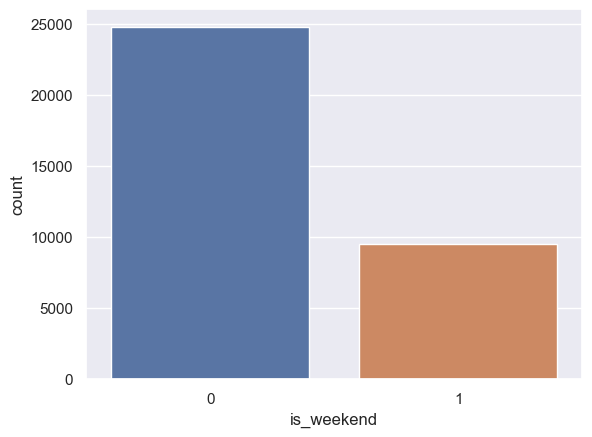

In [114]:
sns.countplot(x='is_weekend',data=df_tt_2) # booking volume on weekday and weekend
plt.show()

<Axes: xlabel='is_weekend', ylabel='count'>

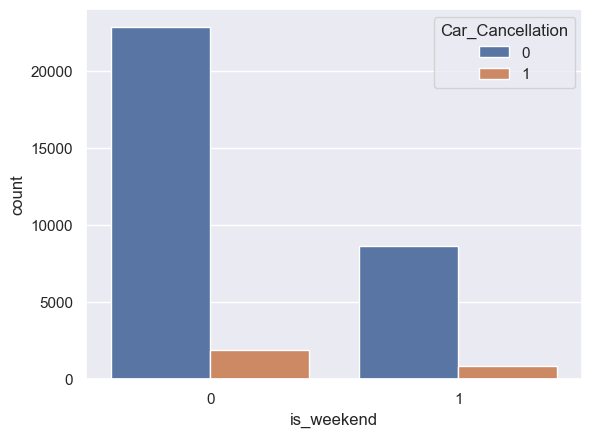

In [115]:
sns.countplot(x='is_weekend',hue='Car_Cancellation',data=df_tt_2)

<Axes: xlabel='day_of_week', ylabel='count'>

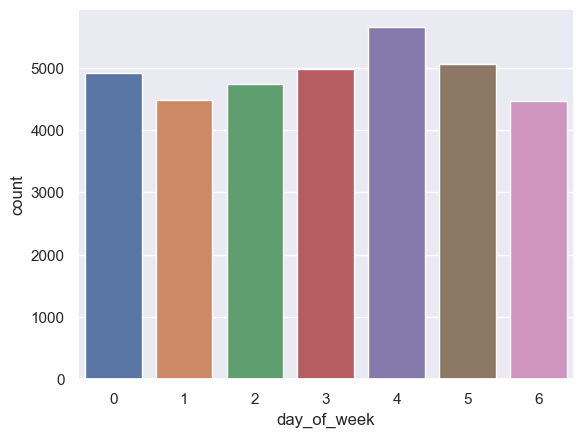

In [116]:
sns.countplot(x='day_of_week',data=df_tt_2) # booking volume on a day of week

<Axes: xlabel='day_of_week', ylabel='count'>

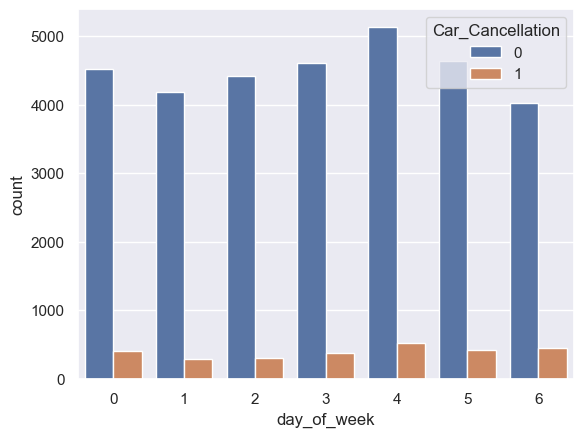

In [117]:
sns.countplot(x='day_of_week',hue='Car_Cancellation',data=df_tt_2)

<Axes: xlabel='day_of_week', ylabel='count'>

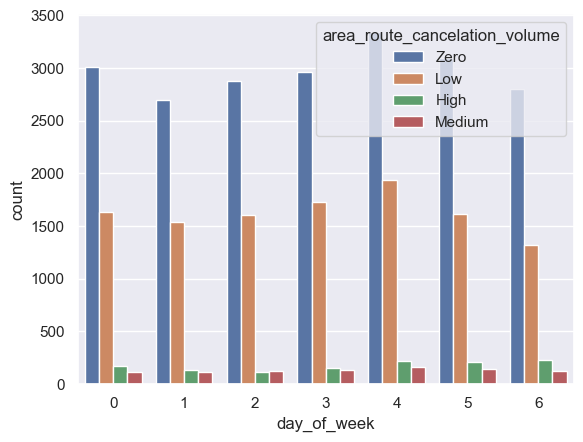

In [118]:
sns.countplot(x='day_of_week',hue='area_route_cancelation_volume',data=df_tt_2)

<Axes: xlabel='day_of_week', ylabel='count'>

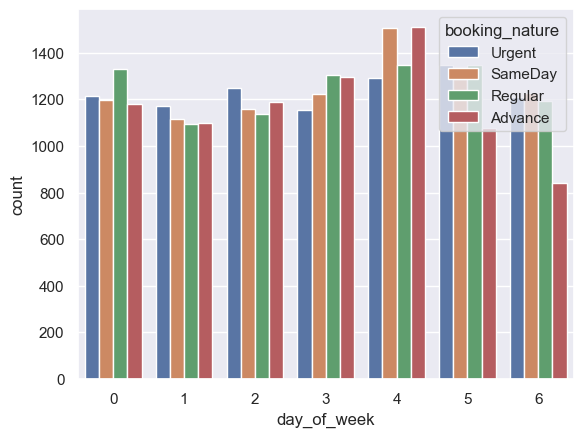

In [119]:
sns.countplot(x='day_of_week',hue='booking_nature',data=df_tt_2)

<Axes: xlabel='booking_nature', ylabel='count'>

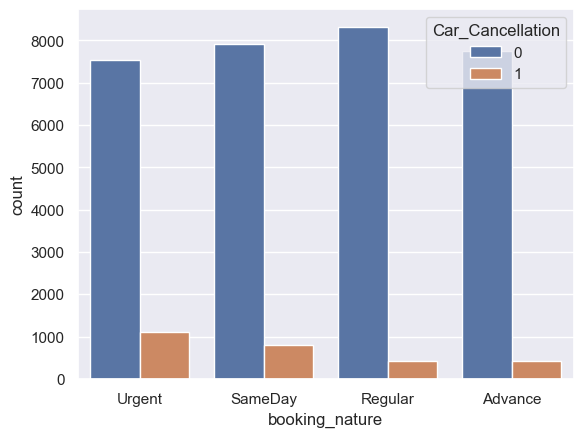

In [120]:
sns.countplot(x='booking_nature',hue='Car_Cancellation',data=df_tt_2)

# Label Encoding

In [121]:
df_tt_2.head()

,area_route_cancelation_volume,booking_nature,time_of_day,is_weekend,day_of_week,month,is_VMID_12,online_booking,mobile_site_booking,distance,Car_Cancellation
0,Zero,Urgent,Night,0,1,1,0,0,0,3.980687,0
1,Zero,SameDay,Morning,0,1,1,1,0,0,14.004432,0
2,Zero,Urgent,Night,0,1,1,1,0,0,12.648909,0
3,Zero,Urgent,Night,0,1,1,1,0,0,9.534596,0
4,Zero,Urgent,Morning,0,1,1,1,0,0,14.655467,0


In [122]:
df_tt_2.area_route_cancelation_volume = df_tt_2.area_route_cancelation_volume.map({"Zero":1,"Low":2,"Medium":3,"High":4})
df_tt_2.booking_nature = df_tt_2.booking_nature.map({"Urgent":1,"SameDay":2,"Regular":3,"Advance":4})
df_tt_2.time_of_day = df_tt_2.time_of_day.map({"Morning":1,"Afternoon":2,"Evening":3,"Night":4})
df_tt_2.head()

,area_route_cancelation_volume,booking_nature,time_of_day,is_weekend,day_of_week,month,is_VMID_12,online_booking,mobile_site_booking,distance,Car_Cancellation
0,1,1,4,0,1,1,0,0,0,3.980687,0
1,1,2,1,0,1,1,1,0,0,14.004432,0
2,1,1,4,0,1,1,1,0,0,12.648909,0
3,1,1,4,0,1,1,1,0,0,9.534596,0
4,1,1,1,0,1,1,1,0,0,14.655467,0


# Machine Learning

In [123]:
# Features and Target

X = df_tt_2.drop('Car_Cancellation',axis=1)
Y = df_tt_2['Car_Cancellation']

In [124]:
X.head()

,area_route_cancelation_volume,booking_nature,time_of_day,is_weekend,day_of_week,month,is_VMID_12,online_booking,mobile_site_booking,distance
0,1,1,4,0,1,1,0,0,0,3.980687
1,1,2,1,0,1,1,1,0,0,14.004432
2,1,1,4,0,1,1,1,0,0,12.648909
3,1,1,4,0,1,1,1,0,0,9.534596
4,1,1,1,0,1,1,1,0,0,14.655467


In [125]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Car_Cancellation, dtype: int64

In [126]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [127]:
x_train.head()

,area_route_cancelation_volume,booking_nature,time_of_day,is_weekend,day_of_week,month,is_VMID_12,online_booking,mobile_site_booking,distance
40619,2,4,2,0,3,11,0,0,0,11.562024
27852,1,3,3,0,2,8,0,1,0,6.342019
22534,1,3,4,1,5,7,1,0,0,33.483770
12578,1,4,4,0,3,5,1,0,0,25.305963
9532,1,1,3,0,2,4,1,0,0,4.437782


In [128]:
y_train.head()

40619    1
27852    0
22534    0
12578    0
9532     0
Name: Car_Cancellation, dtype: int64

In [129]:
x_test.head()

,area_route_cancelation_volume,booking_nature,time_of_day,is_weekend,day_of_week,month,is_VMID_12,online_booking,mobile_site_booking,distance
8809,1,1,1,0,2,4,0,0,0,13.777331
23561,1,1,2,0,4,7,1,0,0,10.013309
36790,2,3,2,0,1,10,1,1,0,33.444703
21452,1,4,2,0,1,7,0,0,0,1.529006
28212,1,1,1,0,4,8,1,0,1,12.838478


In [130]:
y_test.head()

8809     0
23561    0
36790    0
21452    0
28212    0
Name: Car_Cancellation, dtype: int64

# Decision Tree model

In [131]:
dt_model = DecisionTreeClassifier()

In [132]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [133]:
y_train_pred = dt_model.predict(x_train)
y_test_pred = dt_model.predict(x_test)

In [134]:
print(metrics.classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25205
           1       0.99      0.96      0.98      2228

    accuracy                           1.00     27433
   macro avg       0.99      0.98      0.99     27433
weighted avg       1.00      1.00      1.00     27433



In [135]:
print(metrics.classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      6312
           1       0.63      0.62      0.63       547

    accuracy                           0.94      6859
   macro avg       0.80      0.80      0.80      6859
weighted avg       0.94      0.94      0.94      6859



# Naive Bayes Classifier

In [136]:
nb_model = GaussianNB()

In [148]:
nb_model.fit(x_train,y_train)

GaussianNB()

In [149]:
y_train_pred = nb_model.predict(x_train)
y_test_pred = nb_model.predict(x_test)

In [150]:
print(metrics.classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97     25205
           1       0.61      0.63      0.62      2228

    accuracy                           0.94     27433
   macro avg       0.79      0.80      0.79     27433
weighted avg       0.94      0.94      0.94     27433



In [151]:
print(metrics.classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      6312
           1       0.62      0.63      0.62       547

    accuracy                           0.94      6859
   macro avg       0.79      0.80      0.80      6859
weighted avg       0.94      0.94      0.94      6859



# Random Forest

In [138]:
rf_model = RandomForestClassifier()

In [139]:
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [142]:
y_train_pred = rf_model.predict(x_train)
y_test_pred = rf_model.predict(x_test)

In [143]:
print(metrics.classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25205
           1       0.98      0.98      0.98      2228

    accuracy                           1.00     27433
   macro avg       0.99      0.99      0.99     27433
weighted avg       1.00      1.00      1.00     27433



In [144]:
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      6312
           1       0.78      0.63      0.70       547

    accuracy                           0.96      6859
   macro avg       0.88      0.81      0.84      6859
weighted avg       0.95      0.96      0.95      6859



# For dataset where travel_type_id == 2, we can choose to deploy the Random Forest Model, since it is giving best results

# Preprocessing the data when travel id ==3

In [127]:
df_tt_3.head()

,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,is_VMID_12
8,3,2.0,448.0,NaN,NaN,NaN,01-01-2013 16:00,0,0,01-01-2013 09:44,12.927320,77.635750,NaN,NaN,0,0
20,3,2.0,471.0,NaN,NaN,NaN,01-01-2013 14:30,0,0,01-01-2013 12:52,13.018540,77.635240,NaN,NaN,0,0
23,3,1.0,1286.0,NaN,NaN,NaN,01-01-2013 16:30,0,0,01-01-2013 14:39,12.973448,77.620320,NaN,NaN,0,1
34,3,1.0,1323.0,NaN,NaN,NaN,01-01-2013 20:00,1,0,01-01-2013 17:25,12.869805,77.653211,NaN,NaN,0,1
47,3,2.0,142.0,NaN,NaN,NaN,01-02-2013 03:00,0,0,01-01-2013 19:37,12.912810,77.609230,NaN,NaN,0,1


In [128]:
df_tt_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7550 entries, 8 to 43428
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   travel_type_id       7550 non-null   int64  
 1   package_id           7550 non-null   float64
 2   from_area_id         7550 non-null   float64
 3   to_area_id           0 non-null      float64
 4   from_city_id         448 non-null    float64
 5   to_city_id           0 non-null      float64
 6   from_date            7550 non-null   object 
 7   online_booking       7550 non-null   int64  
 8   mobile_site_booking  7550 non-null   int64  
 9   booking_created      7550 non-null   object 
 10  from_lat             7550 non-null   float64
 11  from_long            7550 non-null   float64
 12  to_lat               0 non-null      float64
 13  to_long              0 non-null      float64
 14  Car_Cancellation     7550 non-null   int64  
 15  is_VMID_12           7550 non-null   

In [130]:
df_tt_3 = df_tt_3.drop(['travel_type_id','to_area_id','from_city_id','to_city_id','from_lat','from_long','to_lat','to_long'],axis=1)
df_tt_3.head()

,package_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_VMID_12
8,2.0,448.0,01-01-2013 16:00,0,0,01-01-2013 09:44,0,0
20,2.0,471.0,01-01-2013 14:30,0,0,01-01-2013 12:52,0,0
23,1.0,1286.0,01-01-2013 16:30,0,0,01-01-2013 14:39,0,1
34,1.0,1323.0,01-01-2013 20:00,1,0,01-01-2013 17:25,0,1
47,2.0,142.0,01-02-2013 03:00,0,0,01-01-2013 19:37,0,1


# Missing Value Treatment

In [131]:
df_tt_3.isnull().sum()

package_id             0
from_area_id           0
from_date              0
online_booking         0
mobile_site_booking    0
booking_created        0
Car_Cancellation       0
is_VMID_12             0
dtype: int64

# from_area_id

In [132]:
# Calculating the cancellation perc for each route

from_area_id_cancelation_perc = df_tt_3[['from_area_id','Car_Cancellation']].groupby('from_area_id').mean()['Car_Cancellation']
df_tt_3['from_area_id_cancelation_perc'] = df_tt_3.from_area_id.map(from_area_id_cancelation_perc)
df_tt_3['from_area_id_cancelation_volume'] = np.where(df_tt_3.from_area_id_cancelation_perc >= 0.67, 'High',
                                                     np.where(df_tt_3.from_area_id_cancelation_perc == 0.0, 'Zero',
                                                     np.where(df_tt_3.from_area_id_cancelation_perc <= 0.34, 'Low',
                                                     'Medium'
                                                    )))
df_tt_3.head()

,package_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_VMID_12,from_area_id_cancelation_perc,from_area_id_cancelation_volume
8,2.0,448.0,01-01-2013 16:00,0,0,01-01-2013 09:44,0,0,0.108696,Low
20,2.0,471.0,01-01-2013 14:30,0,0,01-01-2013 12:52,0,0,0.111111,Low
23,1.0,1286.0,01-01-2013 16:30,0,0,01-01-2013 14:39,0,1,0.040000,Low
34,1.0,1323.0,01-01-2013 20:00,1,0,01-01-2013 17:25,0,1,0.115385,Low
47,2.0,142.0,01-02-2013 03:00,0,0,01-01-2013 19:37,0,1,0.054545,Low


In [133]:
df_tt_3 = df_tt_3.drop(['from_area_id_cancelation_perc','from_area_id'],axis=1)
df_tt_3.head()

,package_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_VMID_12,from_area_id_cancelation_volume
8,2.0,01-01-2013 16:00,0,0,01-01-2013 09:44,0,0,Low
20,2.0,01-01-2013 14:30,0,0,01-01-2013 12:52,0,0,Low
23,1.0,01-01-2013 16:30,0,0,01-01-2013 14:39,0,1,Low
34,1.0,01-01-2013 20:00,1,0,01-01-2013 17:25,0,1,Low
47,2.0,01-02-2013 03:00,0,0,01-01-2013 19:37,0,1,Low


# from_date,booking_created

In [135]:
df_tt_3['from_date'] = pd.to_datetime(df_tt_3['from_date'])
df_tt_3['booking_created'] = pd.to_datetime(df_tt_3['booking_created'])

In [136]:
df_tt_3['month'] = df_tt_3.from_date.dt.month
df_tt_3.head()

,package_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_VMID_12,from_area_id_cancelation_volume,month
8,2.0,2013-01-01 16:00:00,0,0,2013-01-01 09:44:00,0,0,Low,1
20,2.0,2013-01-01 14:30:00,0,0,2013-01-01 12:52:00,0,0,Low,1
23,1.0,2013-01-01 16:30:00,0,0,2013-01-01 14:39:00,0,1,Low,1
34,1.0,2013-01-01 20:00:00,1,0,2013-01-01 17:25:00,0,1,Low,1
47,2.0,2013-01-02 03:00:00,0,0,2013-01-01 19:37:00,0,1,Low,1


In [137]:
df_tt_3['day_of_week'] = df_tt_3.from_date.dt.dayofweek  # Monday is 0 and Sunday is 6
df_tt_3.head()

,package_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_VMID_12,from_area_id_cancelation_volume,month,day_of_week
8,2.0,2013-01-01 16:00:00,0,0,2013-01-01 09:44:00,0,0,Low,1,1
20,2.0,2013-01-01 14:30:00,0,0,2013-01-01 12:52:00,0,0,Low,1,1
23,1.0,2013-01-01 16:30:00,0,0,2013-01-01 14:39:00,0,1,Low,1,1
34,1.0,2013-01-01 20:00:00,1,0,2013-01-01 17:25:00,0,1,Low,1,1
47,2.0,2013-01-02 03:00:00,0,0,2013-01-01 19:37:00,0,1,Low,1,2


In [138]:
df_tt_3['is_weekend'] = (df_tt_3['day_of_week'] >=5).astype('int')
df_tt_3.head()

,package_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_VMID_12,from_area_id_cancelation_volume,month,day_of_week,is_weekend
8,2.0,2013-01-01 16:00:00,0,0,2013-01-01 09:44:00,0,0,Low,1,1,0
20,2.0,2013-01-01 14:30:00,0,0,2013-01-01 12:52:00,0,0,Low,1,1,0
23,1.0,2013-01-01 16:30:00,0,0,2013-01-01 14:39:00,0,1,Low,1,1,0
34,1.0,2013-01-01 20:00:00,1,0,2013-01-01 17:25:00,0,1,Low,1,1,0
47,2.0,2013-01-02 03:00:00,0,0,2013-01-01 19:37:00,0,1,Low,1,2,0


In [139]:
df_tt_3['hour_of_day'] = df_tt_3.from_date.dt.hour 
df_tt_3.head()

,package_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_VMID_12,from_area_id_cancelation_volume,month,day_of_week,is_weekend,hour_of_day
8,2.0,2013-01-01 16:00:00,0,0,2013-01-01 09:44:00,0,0,Low,1,1,0,16
20,2.0,2013-01-01 14:30:00,0,0,2013-01-01 12:52:00,0,0,Low,1,1,0,14
23,1.0,2013-01-01 16:30:00,0,0,2013-01-01 14:39:00,0,1,Low,1,1,0,16
34,1.0,2013-01-01 20:00:00,1,0,2013-01-01 17:25:00,0,1,Low,1,1,0,20
47,2.0,2013-01-02 03:00:00,0,0,2013-01-01 19:37:00,0,1,Low,1,2,0,3


In [140]:
df_tt_3['time_of_day'] = pd.cut(df_tt_3['hour_of_day'], bins=[-1,6,12,18,24],labels=['Night','Morning','Afternoon','Evening'])
df_tt_3.head()

,package_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_VMID_12,from_area_id_cancelation_volume,month,day_of_week,is_weekend,hour_of_day,time_of_day
8,2.0,2013-01-01 16:00:00,0,0,2013-01-01 09:44:00,0,0,Low,1,1,0,16,Afternoon
20,2.0,2013-01-01 14:30:00,0,0,2013-01-01 12:52:00,0,0,Low,1,1,0,14,Afternoon
23,1.0,2013-01-01 16:30:00,0,0,2013-01-01 14:39:00,0,1,Low,1,1,0,16,Afternoon
34,1.0,2013-01-01 20:00:00,1,0,2013-01-01 17:25:00,0,1,Low,1,1,0,20,Evening
47,2.0,2013-01-02 03:00:00,0,0,2013-01-01 19:37:00,0,1,Low,1,2,0,3,Night


In [141]:
df_tt_3['time_diff'] = (df_tt_3.from_date - df_tt_3.booking_created).dt.total_seconds()/3600
df_tt_3.head()

,package_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_VMID_12,from_area_id_cancelation_volume,month,day_of_week,is_weekend,hour_of_day,time_of_day,time_diff
8,2.0,2013-01-01 16:00:00,0,0,2013-01-01 09:44:00,0,0,Low,1,1,0,16,Afternoon,6.266667
20,2.0,2013-01-01 14:30:00,0,0,2013-01-01 12:52:00,0,0,Low,1,1,0,14,Afternoon,1.633333
23,1.0,2013-01-01 16:30:00,0,0,2013-01-01 14:39:00,0,1,Low,1,1,0,16,Afternoon,1.850000
34,1.0,2013-01-01 20:00:00,1,0,2013-01-01 17:25:00,0,1,Low,1,1,0,20,Evening,2.583333
47,2.0,2013-01-02 03:00:00,0,0,2013-01-01 19:37:00,0,1,Low,1,2,0,3,Night,7.383333


In [142]:
df_tt_3['time_diff'].describe()

count    7550.000000
mean       14.570344
std        39.198073
min        -3.550000
25%         1.920833
50%         5.858333
75%        13.766667
max       695.550000
Name: time_diff, dtype: float64

In [143]:
df_tt_3['booking_nature'] = pd.cut(df_tt_3['time_diff'], bins=[-4,2,6,13,700],labels=['Urgent','SameDay','Regular','Advance'])
df_tt_3.head()

,package_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_VMID_12,from_area_id_cancelation_volume,month,day_of_week,is_weekend,hour_of_day,time_of_day,time_diff,booking_nature
8,2.0,2013-01-01 16:00:00,0,0,2013-01-01 09:44:00,0,0,Low,1,1,0,16,Afternoon,6.266667,Regular
20,2.0,2013-01-01 14:30:00,0,0,2013-01-01 12:52:00,0,0,Low,1,1,0,14,Afternoon,1.633333,Urgent
23,1.0,2013-01-01 16:30:00,0,0,2013-01-01 14:39:00,0,1,Low,1,1,0,16,Afternoon,1.850000,Urgent
34,1.0,2013-01-01 20:00:00,1,0,2013-01-01 17:25:00,0,1,Low,1,1,0,20,Evening,2.583333,SameDay
47,2.0,2013-01-02 03:00:00,0,0,2013-01-01 19:37:00,0,1,Low,1,2,0,3,Night,7.383333,Regular


In [144]:
df_tt_3 = df_tt_3.drop(['from_date','booking_created','hour_of_day','time_diff'],axis=1)
df_tt_3.head()

,package_id,online_booking,mobile_site_booking,Car_Cancellation,is_VMID_12,from_area_id_cancelation_volume,month,day_of_week,is_weekend,time_of_day,booking_nature
8,2.0,0,0,0,0,Low,1,1,0,Afternoon,Regular
20,2.0,0,0,0,0,Low,1,1,0,Afternoon,Urgent
23,1.0,0,0,0,1,Low,1,1,0,Afternoon,Urgent
34,1.0,1,0,0,1,Low,1,1,0,Evening,SameDay
47,2.0,0,0,0,1,Low,1,2,0,Night,Regular


# Rearranging the Cols

In [145]:
df_tt_3 = df_tt_3[['from_area_id_cancelation_volume','booking_nature','time_of_day','is_weekend','day_of_week','month','is_VMID_12','online_booking','mobile_site_booking','Car_Cancellation']]
df_tt_3.head()

,from_area_id_cancelation_volume,booking_nature,time_of_day,is_weekend,day_of_week,month,is_VMID_12,online_booking,mobile_site_booking,Car_Cancellation
8,Low,Regular,Afternoon,0,1,1,0,0,0,0
20,Low,Urgent,Afternoon,0,1,1,0,0,0,0
23,Low,Urgent,Afternoon,0,1,1,1,0,0,0
34,Low,SameDay,Evening,0,1,1,1,1,0,0
47,Low,Regular,Night,0,2,1,1,0,0,0


# EDA

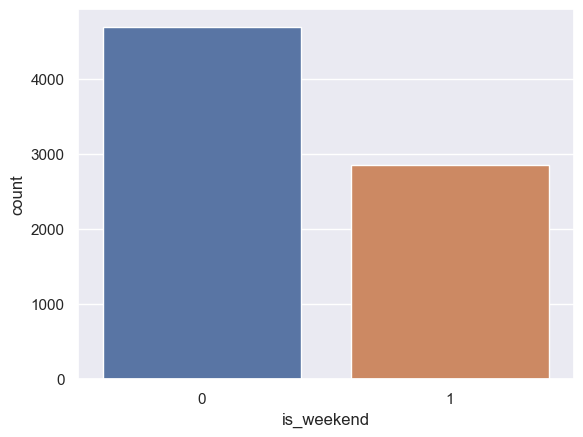

In [146]:
sns.countplot(x='is_weekend',data=df_tt_3)  # booking volume on a weekday and weekend
plt.show()

<Axes: xlabel='is_weekend', ylabel='count'>

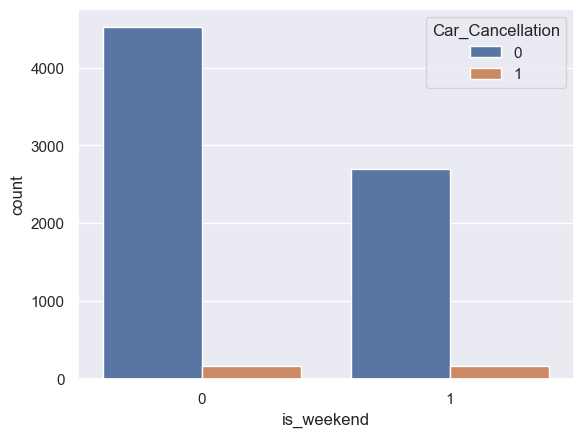

In [147]:
sns.countplot(x='is_weekend',hue='Car_Cancellation',data=df_tt_3)

<Axes: xlabel='day_of_week', ylabel='count'>

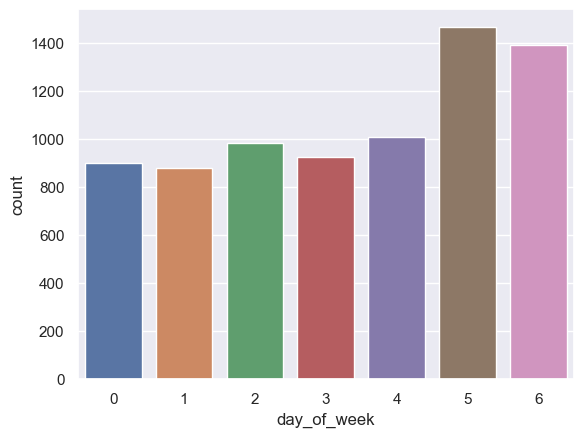

In [148]:
sns.countplot(x='day_of_week',data=df_tt_3)  # booking volume on a day of week

<Axes: xlabel='day_of_week', ylabel='count'>

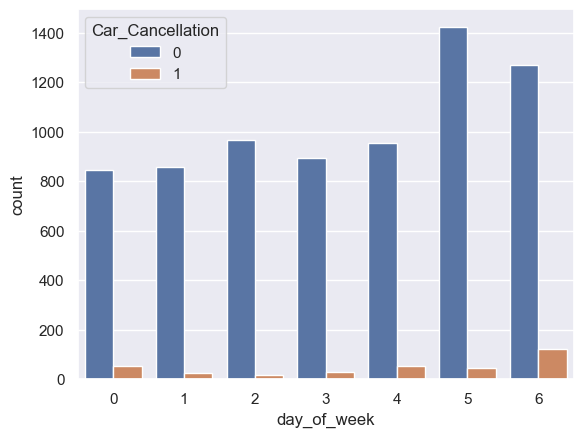

In [149]:
sns.countplot(x='day_of_week',hue='Car_Cancellation',data=df_tt_3)

<Axes: xlabel='day_of_week', ylabel='count'>

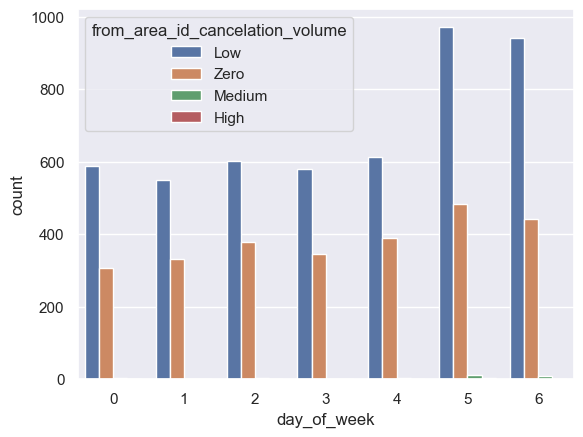

In [150]:
sns.countplot(x='day_of_week',hue='from_area_id_cancelation_volume',data=df_tt_3)

<Axes: xlabel='day_of_week', ylabel='count'>

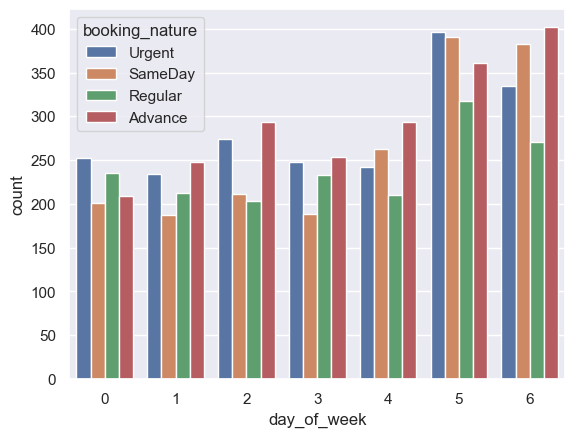

In [151]:
sns.countplot(x='day_of_week',hue='booking_nature',data=df_tt_3)

<Axes: xlabel='booking_nature', ylabel='count'>

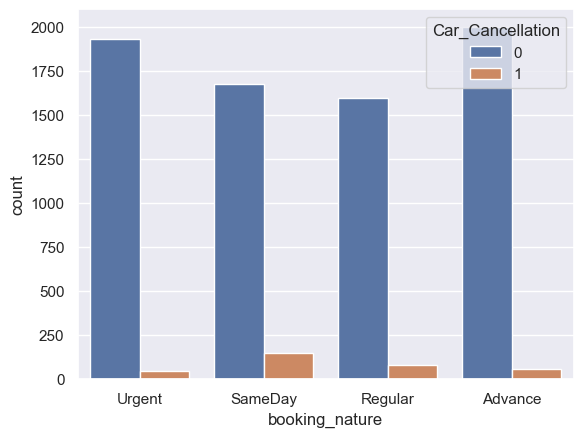

In [152]:
sns.countplot(x='booking_nature',hue='Car_Cancellation',data=df_tt_3)

# Label encoding

In [153]:
df_tt_3.head()

,from_area_id_cancelation_volume,booking_nature,time_of_day,is_weekend,day_of_week,month,is_VMID_12,online_booking,mobile_site_booking,Car_Cancellation
8,Low,Regular,Afternoon,0,1,1,0,0,0,0
20,Low,Urgent,Afternoon,0,1,1,0,0,0,0
23,Low,Urgent,Afternoon,0,1,1,1,0,0,0
34,Low,SameDay,Evening,0,1,1,1,1,0,0
47,Low,Regular,Night,0,2,1,1,0,0,0


In [154]:
df_tt_3.from_area_id_cancelation_volume = df_tt_3.from_area_id_cancelation_volume.map({"Zero":1,"Low":2,"Medium":3,"High":4})
df_tt_3.booking_nature = df_tt_3.booking_nature.map({"Urgent":1,"SameDay":2,"Regular":3,"Advance":4})
df_tt_3.time_of_day = df_tt_3.time_of_day.map({"Morning":1,"Afternoon":2,"Evening":3,"Night":4})
df_tt_3.head()

,from_area_id_cancelation_volume,booking_nature,time_of_day,is_weekend,day_of_week,month,is_VMID_12,online_booking,mobile_site_booking,Car_Cancellation
8,2,3,2,0,1,1,0,0,0,0
20,2,1,2,0,1,1,0,0,0,0
23,2,1,2,0,1,1,1,0,0,0
34,2,2,3,0,1,1,1,1,0,0
47,2,3,4,0,2,1,1,0,0,0


# Machine Learning

In [155]:
# Features and Target

X = df_tt_3.drop('Car_Cancellation',axis=1)
Y = df_tt_3['Car_Cancellation']

In [156]:
X.head()

,from_area_id_cancelation_volume,booking_nature,time_of_day,is_weekend,day_of_week,month,is_VMID_12,online_booking,mobile_site_booking
8,2,3,2,0,1,1,0,0,0
20,2,1,2,0,1,1,0,0,0
23,2,1,2,0,1,1,1,0,0
34,2,2,3,0,1,1,1,1,0
47,2,3,4,0,2,1,1,0,0


In [157]:
Y.head()

8     0
20    0
23    0
34    0
47    0
Name: Car_Cancellation, dtype: int64

In [158]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [159]:
x_train.head()

,from_area_id_cancelation_volume,booking_nature,time_of_day,is_weekend,day_of_week,month,is_VMID_12,online_booking,mobile_site_booking
32004,1,2,2,0,4,9,1,1,0
28966,2,2,2,0,1,8,1,1,0
25741,2,4,2,1,5,8,0,1,0
302,1,4,1,1,6,1,0,1,0
14287,2,2,3,1,6,5,1,1,0


In [160]:
y_train.head()

32004    0
28966    0
25741    0
302      0
14287    1
Name: Car_Cancellation, dtype: int64

In [161]:
x_test.head()

,from_area_id_cancelation_volume,booking_nature,time_of_day,is_weekend,day_of_week,month,is_VMID_12,online_booking,mobile_site_booking
42520,2,3,3,1,5,11,0,1,0
36401,1,2,1,1,5,10,0,0,0
8725,2,3,2,0,1,4,1,0,0
17397,1,2,2,1,5,6,1,1,0
32342,1,3,1,1,6,9,1,1,0


In [162]:
y_test.head()

42520    0
36401    0
8725     0
17397    0
32342    0
Name: Car_Cancellation, dtype: int64

# Decision Tree model

In [163]:
dt_model = DecisionTreeClassifier()

In [164]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [165]:
y_train_pred = dt_model.predict(x_train)
y_test_pred = dt_model.predict(x_test)

In [166]:
print(metrics.classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5768
           1       0.89      0.52      0.65       272

    accuracy                           0.98      6040
   macro avg       0.93      0.76      0.82      6040
weighted avg       0.97      0.98      0.97      6040



In [167]:
print(metrics.classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1446
           1       0.35      0.20      0.26        64

    accuracy                           0.95      1510
   macro avg       0.66      0.59      0.62      1510
weighted avg       0.94      0.95      0.94      1510



# Naive Bayes Classifier

In [168]:
nb_model = GaussianNB()

In [169]:
nb_model.fit(x_train,y_train)

GaussianNB()

In [170]:
y_train_pred = nb_model.predict(x_train)
y_test_pred = nb_model.predict(x_test)

In [171]:
print(metrics.classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      5768
           1       0.11      0.05      0.07       272

    accuracy                           0.94      6040
   macro avg       0.54      0.52      0.52      6040
weighted avg       0.92      0.94      0.93      6040



In [172]:
print(metrics.classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1446
           1       0.17      0.08      0.11        64

    accuracy                           0.94      1510
   macro avg       0.56      0.53      0.54      1510
weighted avg       0.93      0.94      0.93      1510



# Random Forest

In [173]:
rf_model = RandomForestClassifier()

In [174]:
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [175]:
y_train_pred = rf_model.predict(x_train)
y_test_pred = rf_model.predict(x_test)

In [176]:
print(metrics.classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5768
           1       0.87      0.53      0.66       272

    accuracy                           0.98      6040
   macro avg       0.93      0.76      0.82      6040
weighted avg       0.97      0.98      0.97      6040



In [177]:
print(metrics.classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1446
           1       0.35      0.17      0.23        64

    accuracy                           0.95      1510
   macro avg       0.66      0.58      0.60      1510
weighted avg       0.94      0.95      0.94      1510



# For dataset where travel_type_id == 3, we can choose to deploy the Random Forest Model, since it is giving best results